In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from nltk.corpus import stopwords
import time
#Supervised
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.svm import LinearSVC
import pickle
#Unsupervised
# Deep Learning
import torch
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Embedding, LSTM, Dropout

In [2]:
sent= pd.read_csv("./Outputs/sentimentos_tweeteros.csv")
sent.head()

,date,user_name,user_loc,message,full_name,country,country_code,geo_code,longitud_mensaje,palabras,refinado,latitud,longitud,states,Polaridad,Subjetividad,Label
0,2020-10-10 11:41:36,susanha77835097,"Florida, USA",@blossomingabyss @JoeBiden He filled his pocke...,"Sunny Isles Beach, FL",United States,US,[-80.125071 25.92906 ],140,18,"['filled', 'pocketskids', 'familyharris', 'unq...",-80.125071,25.929060,FL,0.40,0.90,Positiva
1,2020-10-10 11:19:05,tomborelli,"Greenwich, CT",Supporting @JoeBiden means packing the Supreme...,"Greenwich, CT",United States,US,[-73.63941 41.050217],144,17,"['supporting', 'means', 'packing', 'supreme', ...",-73.639410,41.050217,CT,0.25,0.25,Positiva
2,2020-10-10 09:39:10,John_Di_Lemme,(561) 847-3467,@ABC13News @realDonaldTrump @JoeBiden Nancy Pe...,"West Palm Beach, FL",United States,US,[-80.12262 26.721896],133,15,"['nancy', 'pelosi', 'nuts', 'joe', 'biden', 'k...",-80.122620,26.721896,FL,0.00,0.00,Neutral
3,2020-10-10 08:39:14,Parnell_100,United Kingdom,@JoeBiden There is NO STOPPING this AMERICAN T...,"Belfast, Northern Ireland",United Kingdom,GB,[-5.928413 54.595869],140,23,"['stopping', 'american', 'trinity', 'train', '...",-5.928413,54.595869,Non_USA,0.00,0.00,Neutral
4,2020-10-10 07:18:33,sqlblues,"Weston-super-Mare, England",@FenrirWolf26 @Stanhope2011VJ Britons have als...,"Weston-super-Mare, England",United Kingdom,GB,[-2.94513 51.346796],139,17,"['britons', 'also', 'pumped', 'relentless', 'd...",-2.945130,51.346796,Non_USA,-0.30,0.40,Negativa


In [3]:
le = LabelEncoder()
sent["Label_enc"] = le.fit_transform(sent["Label"])

# Display the encoded labels
display(sent[["Label_enc"]].head())

# Select the features and the target
X = sent['refinado']
y = sent["Label_enc"]

,Label_enc
0,2
1,2
2,1
3,1
4,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
tfidfstops=stopwords.words('english')
vectorizer = TfidfVectorizer(max_features=5000, stop_words= tfidfstops)

# Create the tf-idf vectorizer
model_vectorizer = TfidfVectorizer()

# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)

# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)

# Initialize the Bernoulli Naive Bayes classifier
nb = BernoulliNB()

# Fit the model
nb.fit(tfidf_train, y_train)

# Print the accuracy score
best_accuracy = cross_val_score(nb, tfidf_test, y_test, cv=10, scoring='accuracy').max()
print("Accuracy:",best_accuracy)



Accuracy: 0.52


### Precision del 52%, un poco mejor que lanzar una moneda al aire y elegir un resultado. 
# HAY QUE MEJORARLO.

In [6]:
y_pred = nb.predict(tfidf_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\nMatriz 3x3 donde se ven los tweets que se catalogaron erroneamente\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

Confusion Matrix
Matriz 3x3 donde se ven los tweets que se catalogaron erroneamente

[[ 29  66  17]
 [  0 225   7]
 [  1  59  97]]


Classification Report

              precision    recall  f1-score   support

           0       0.97      0.26      0.41       112
           1       0.64      0.97      0.77       232
           2       0.80      0.62      0.70       157

    accuracy                           0.70       501
   macro avg       0.80      0.62      0.63       501
weighted avg       0.77      0.70      0.67       501



In [7]:
pickle.dump(nb, open("./Outputs/model.pkl", 'wb'))

In [8]:
train=pd.read_csv("./Outputs/sentimentos_tweeteros.csv")
train.head()
test=pd.read_csv("./Outputs/sentimentos_tweeteros.csv")
train.head()


,date,user_name,user_loc,message,full_name,country,country_code,geo_code,longitud_mensaje,palabras,refinado,latitud,longitud,states,Polaridad,Subjetividad,Label
0,2020-10-10 11:41:36,susanha77835097,"Florida, USA",@blossomingabyss @JoeBiden He filled his pocke...,"Sunny Isles Beach, FL",United States,US,[-80.125071 25.92906 ],140,18,"['filled', 'pocketskids', 'familyharris', 'unq...",-80.125071,25.929060,FL,0.40,0.90,Positiva
1,2020-10-10 11:19:05,tomborelli,"Greenwich, CT",Supporting @JoeBiden means packing the Supreme...,"Greenwich, CT",United States,US,[-73.63941 41.050217],144,17,"['supporting', 'means', 'packing', 'supreme', ...",-73.639410,41.050217,CT,0.25,0.25,Positiva
2,2020-10-10 09:39:10,John_Di_Lemme,(561) 847-3467,@ABC13News @realDonaldTrump @JoeBiden Nancy Pe...,"West Palm Beach, FL",United States,US,[-80.12262 26.721896],133,15,"['nancy', 'pelosi', 'nuts', 'joe', 'biden', 'k...",-80.122620,26.721896,FL,0.00,0.00,Neutral
3,2020-10-10 08:39:14,Parnell_100,United Kingdom,@JoeBiden There is NO STOPPING this AMERICAN T...,"Belfast, Northern Ireland",United Kingdom,GB,[-5.928413 54.595869],140,23,"['stopping', 'american', 'trinity', 'train', '...",-5.928413,54.595869,Non_USA,0.00,0.00,Neutral
4,2020-10-10 07:18:33,sqlblues,"Weston-super-Mare, England",@FenrirWolf26 @Stanhope2011VJ Britons have als...,"Weston-super-Mare, England",United Kingdom,GB,[-2.94513 51.346796],139,17,"['britons', 'also', 'pumped', 'relentless', 'd...",-2.945130,51.346796,Non_USA,-0.30,0.40,Negativa


In [9]:
test=train.copy()

In [10]:
def numerar_polaridad(polaridad):
    if polaridad == 'Positiva':
        return 1
    if polaridad == "Neutral":
        return 0
    if polaridad == "Negativa":
        return -1

train["nLabel"] = train["Label"].apply(numerar_polaridad)
test["nLabel"] = test["Label"].apply(numerar_polaridad)

In [11]:
train.drop(['date','Label','user_loc','Polaridad','Subjetividad','full_name','longitud_mensaje','palabras','country_code','geo_code','country','states','latitud','longitud'],axis=1 ,inplace=True)


In [12]:
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(train['message'][:2000], train['nLabel'][:2000], test_size=0.2)


# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(strip_accents='ascii',
                            stop_words='english',
                            lowercase=True)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

# this is where we define the values for GridSearchCV to iterate over
parameters = {'bow__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'classifier__alpha': (1e-2, 1e-3),
             }

# do 10-fold cross validation for each of the 6 possible combinations of the above params
grid = GridSearchCV(pipeline, cv=10, param_grid=parameters, verbose=1)
grid.fit(X_train,y_train)

# summarize results
print("\nBest Model: %f using %s" % (grid.best_score_, grid.best_params_))
print('\n')
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Model: 0.676875 using {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}


Mean: 0.666250 Stdev:(0.025187) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.676875 Stdev:(0.029322) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.662500 Stdev:(0.024206) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.674375 Stdev:(0.021000) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': False}
Mean: 0.656250 Stdev:(0.029843) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.662500 Stdev:(0.036550) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.646875 Stdev:(0.025349) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.658125 Stdev:(0.034009) with: {'bow__ngram_range'

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    4.1s finished


In [13]:
import joblib
joblib.dump(grid, "./models/twitter_sentiment.pkl")

['./models/twitter_sentiment.pkl']

In [14]:
# load from file and predict using the best configs found in the CV step
model_NB = joblib.load("./models/twitter_sentiment.pkl")

# get predictions from best model above
y_preds = model_NB.predict(X_test)

print('accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
print('confusion matrix: \n',confusion_matrix(y_test,y_preds))
print('\n')
print(classification_report(y_test, y_preds))



accuracy score:  0.685


confusion matrix: 
 [[ 46  20  29]
 [ 10 146  25]
 [ 15  27  82]]


              precision    recall  f1-score   support

          -1       0.65      0.48      0.55        95
           0       0.76      0.81      0.78       181
           1       0.60      0.66      0.63       124

    accuracy                           0.69       400
   macro avg       0.67      0.65      0.66       400
weighted avg       0.68      0.69      0.68       400



In [15]:
tweet_preds = model_NB.predict(sent['message'])

# append predictions to dataframe
df_tweet_preds = sent.copy()
df_tweet_preds['predictions'] = tweet_preds
df_tweet_preds.shape

(2504, 19)

In [16]:
import random
# print text and sentiment

index = random.sample(range(tweet_preds.shape[0]), 20)
for text, sentiment in zip(df_tweet_preds.message[index],
                           df_tweet_preds.predictions[index]):
    print (sentiment, '--', text, '\n')

0 -- @HCTrudo @JoeBiden Voters don’t care about hypotheticals. What Biden will do depends upon what Trump does before he… https://t.co/khPQBMG8FK 

1 -- @Mike_Pence :: Transparancy Practice we continue.. He say thanks to @JoeBiden about his father...@SenKamalaHarris :… https://t.co/0JVPFjcmkA 

1 -- @JoeBiden Don't let up on Trump. We know Trump is a liar, and now  the doctors are lying to. He wants 2 stay in con… https://t.co/atLJU4uEK4 

1 -- @stonecold2050 Joe Biden should absolutely continue his campaign. He will do it in the humane and responsible way t… https://t.co/cpl4a5AYlt 

1 -- @realDonaldTrump All this thanks to the new President...Joe Biden. Good by to the impeached president Donald J trump. 

0 -- @Sammy_Hustle @RichardGrenell @PeteButtigieg @FoxNews @JoeBiden Until I hear Trump even Close to Biden said about A… https://t.co/XBO4AGK1B4 

0 -- @USAIDMBekkering @IvankaTrump @CommunityofDem @USAID @CoD_Women Ivanka more Americans are realizing that the only w… https://t.co/

In [17]:
train.head()

,user_name,message,refinado,nLabel
0,susanha77835097,@blossomingabyss @JoeBiden He filled his pocke...,"['filled', 'pocketskids', 'familyharris', 'unq...",1
1,tomborelli,Supporting @JoeBiden means packing the Supreme...,"['supporting', 'means', 'packing', 'supreme', ...",1
2,John_Di_Lemme,@ABC13News @realDonaldTrump @JoeBiden Nancy Pe...,"['nancy', 'pelosi', 'nuts', 'joe', 'biden', 'k...",0
3,Parnell_100,@JoeBiden There is NO STOPPING this AMERICAN T...,"['stopping', 'american', 'trinity', 'train', '...",0
4,sqlblues,@FenrirWolf26 @Stanhope2011VJ Britons have als...,"['britons', 'also', 'pumped', 'relentless', 'd...",-1


In [18]:
#train=pd.get_dummies(data=train, columns=['nLabel'])

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def polarity_scores_all(tweet):
  '''
  Takes string of text to:
  1. Gets sentiment metrics
  2. Returns negative, neutral, positive 
  and compound scores as lists.
  '''
  neg, neu, pos, compound = [], [], [], []
  analyser = SentimentIntensityAnalyzer()
  
  for message in tweet:
    dict_ = analyser.polarity_scores(message)
    neg.append(dict_['neg'])
    neu.append(dict_['neu'])
    pos.append(dict_['pos'])
    compound.append(dict_['compound'])
  
  return neg, neu, pos, compound

In [20]:
all_scores = polarity_scores_all(train.refinado.values)
train['neg_scores'] = all_scores[0]
train['neu_scores'] = all_scores[1]
train['pos_scores'] = all_scores[2]
train['compound_scores'] = all_scores[3]

train.head(10)

,user_name,message,refinado,nLabel,neg_scores,neu_scores,pos_scores,compound_scores
0,susanha77835097,@blossomingabyss @JoeBiden He filled his pocke...,"['filled', 'pocketskids', 'familyharris', 'unq...",1,0.000,1.000,0.000,0.0000
1,tomborelli,Supporting @JoeBiden means packing the Supreme...,"['supporting', 'means', 'packing', 'supreme', ...",1,0.000,0.552,0.448,0.7579
2,John_Di_Lemme,@ABC13News @realDonaldTrump @JoeBiden Nancy Pe...,"['nancy', 'pelosi', 'nuts', 'joe', 'biden', 'k...",0,0.247,0.753,0.000,-0.3182
3,Parnell_100,@JoeBiden There is NO STOPPING this AMERICAN T...,"['stopping', 'american', 'trinity', 'train', '...",0,0.167,0.833,0.000,-0.1531
4,sqlblues,@FenrirWolf26 @Stanhope2011VJ Britons have als...,"['britons', 'also', 'pumped', 'relentless', 'd...",-1,0.339,0.550,0.110,-0.5423
5,_walkforACure,US presidential debate officially cancelled\n\...,"['presidential', 'debate', 'officially', 'canc...",0,0.286,0.714,0.000,-0.2500
6,newollien,"@blossomingabyss @JoeBiden Oh behave, you tit....","['behave', 'tit', 'trump', 'tactic', 'debate',...",0,0.381,0.619,0.000,-0.5719
7,AIPCMaha,Joe Biden is surging in the battle for the Whi...,"['joe', 'biden', 'surging', 'battle', 'white',...",-1,0.206,0.794,0.000,-0.3818
8,RonnieMro,We know exactly what we’re getting with Donald...,"['know', 'exactly', 'getting', 'donald', 'trum...",-1,0.000,1.000,0.000,0.0000
9,cyn507,Looks like @realDonaldTrump is running scared....,"['looks', 'like', 'running', 'scared', 'bag', ...",0,0.341,0.465,0.194,-0.2263


In [21]:
pos_family = {  
    'NOUN' : ['NN','NNS','NNP'], # Removed 'NNPS'
    'PRON' : ['PRP','PRP$','WP'],
    'VERB' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'ADJ' :  ['JJ','JJR','JJS'],
    'ADV' : ['RB','RBR','RBS','WRB']
}

def count_pos_tag(tweets):
  '''
  Takes string of text to:
  1. Processes text and attaches POS tags
  2. Input the dictionary of POS tags into a Counter.
  2. Returns list of POS tags with occurrence number '''
  total_count = []
  for s in tweets:
    partial_count = {}
    s = s.split()
    count_pos = Counter(dict(nltk.pos_tag(s)).values())
    
    for item, value in count_pos.items():
      partial_count[item] = partial_count.get(item, 0) + 1
            
    total_count.append(partial_count)

  return total_count

In [22]:
# Retrieve POS tags with occurrence 
total_count = count_pos_tag(train.message.values)
# As dataframe 
pos_df = pd.DataFrame(total_count)
# Remove unwanted characters
# Inspection
pos_df.reindex

<bound method DataFrame.reindex of        RB  VBZ  PRP  VBD  PRP$  NNS   NN  VBN  PDT   DT  ...  NNPS  UH  RBR  \
0     1.0  1.0  1.0  1.0   1.0  1.0  1.0  1.0  1.0  1.0  ...   NaN NaN  NaN   
1     1.0  NaN  NaN  NaN   NaN  1.0  1.0  NaN  NaN  1.0  ...   NaN NaN  NaN   
2     NaN  NaN  NaN  NaN   NaN  1.0  1.0  NaN  NaN  NaN  ...   NaN NaN  NaN   
3     NaN  1.0  NaN  NaN   NaN  1.0  1.0  NaN  NaN  1.0  ...   NaN NaN  NaN   
4     1.0  NaN  NaN  NaN   NaN  1.0  1.0  1.0  NaN  1.0  ...   NaN NaN  NaN   
...   ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...   ...  ..  ...   
2499  1.0  NaN  1.0  1.0   NaN  NaN  1.0  NaN  NaN  1.0  ...   NaN NaN  NaN   
2500  NaN  1.0  1.0  NaN   NaN  NaN  1.0  NaN  1.0  1.0  ...   NaN NaN  NaN   
2501  NaN  NaN  1.0  1.0   NaN  NaN  1.0  NaN  NaN  1.0  ...   NaN NaN  NaN   
2502  NaN  NaN  NaN  NaN   NaN  NaN  1.0  NaN  NaN  1.0  ...   NaN NaN  NaN   
2503  1.0  NaN  1.0  1.0   NaN  1.0  1.0  NaN  NaN  1.0  ...   NaN NaN  NaN   

       (   $  LS

In [23]:

pos_df['NOUN'] = pos_df[pos_family['NOUN']].sum(axis=1)
pos_df['PRON'] = pos_df[pos_family['PRON']].sum(axis=1)
pos_df['VERB'] = pos_df[pos_family['VERB']].sum(axis=1)
pos_df['ADJ'] = pos_df[pos_family['ADJ']].sum(axis=1)
pos_df['ADV'] = pos_df[pos_family['ADV']].sum(axis=1)

pos_df = pos_df[['NOUN', 'PRON', 'VERB', 'ADJ', 'ADV']]

In [24]:
train = pd.concat([train, pos_df], axis = 1)
train = train.fillna(value=0.0)
train

,user_name,message,refinado,nLabel,neg_scores,neu_scores,pos_scores,compound_scores,NOUN,PRON,VERB,ADJ,ADV
0,susanha77835097,@blossomingabyss @JoeBiden He filled his pocke...,"['filled', 'pocketskids', 'familyharris', 'unq...",1,0.000,1.000,0.000,0.0000,3.0,2.0,4.0,0.0,1.0
1,tomborelli,Supporting @JoeBiden means packing the Supreme...,"['supporting', 'means', 'packing', 'supreme', ...",1,0.000,0.552,0.448,0.7579,3.0,0.0,2.0,1.0,1.0
2,John_Di_Lemme,@ABC13News @realDonaldTrump @JoeBiden Nancy Pe...,"['nancy', 'pelosi', 'nuts', 'joe', 'biden', 'k...",0,0.247,0.753,0.000,-0.3182,3.0,0.0,1.0,1.0,0.0
3,Parnell_100,@JoeBiden There is NO STOPPING this AMERICAN T...,"['stopping', 'american', 'trinity', 'train', '...",0,0.167,0.833,0.000,-0.1531,3.0,0.0,2.0,0.0,0.0
4,sqlblues,@FenrirWolf26 @Stanhope2011VJ Britons have als...,"['britons', 'also', 'pumped', 'relentless', 'd...",-1,0.339,0.550,0.110,-0.5423,3.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,JojoAkoto,Great debate between Donald Trump and Joe Bide...,"['great', 'debate', 'donald', 'trump', 'joe', ...",1,0.000,0.305,0.695,0.9287,2.0,1.0,2.0,2.0,1.0
2500,Crackerthe4th,To all the undecided voters: the biggest sprea...,"['undecided', 'voters', 'big', 'spreader', 'mi...",0,0.339,0.403,0.258,0.0000,2.0,1.0,1.0,2.0,0.0
2501,ThomasCagganel1,@thebradfordfile Chris Wallace went after Dona...,"['chris', 'wallace', 'went', 'donald', 'trump'...",0,0.147,0.662,0.191,0.1531,2.0,1.0,2.0,1.0,0.0
2502,Hal4,https://t.co/faYZgsey1P Something #good for a ...,"['something', 'good', 'change']",1,0.000,0.408,0.592,0.4404,1.0,0.0,1.0,1.0,0.0


In [25]:
train.drop_duplicates(subset=['message'], inplace=True)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2495 entries, 0 to 2503
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_name        2495 non-null   object 
 1   message          2495 non-null   object 
 2   refinado         2495 non-null   object 
 3   nLabel           2495 non-null   int64  
 4   neg_scores       2495 non-null   float64
 5   neu_scores       2495 non-null   float64
 6   pos_scores       2495 non-null   float64
 7   compound_scores  2495 non-null   float64
 8   NOUN             2495 non-null   float64
 9   PRON             2495 non-null   float64
 10  VERB             2495 non-null   float64
 11  ADJ              2495 non-null   float64
 12  ADV              2495 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 272.9+ KB


In [27]:
train.head(10)

,user_name,message,refinado,nLabel,neg_scores,neu_scores,pos_scores,compound_scores,NOUN,PRON,VERB,ADJ,ADV
0,susanha77835097,@blossomingabyss @JoeBiden He filled his pocke...,"['filled', 'pocketskids', 'familyharris', 'unq...",1,0.000,1.000,0.000,0.0000,3.0,2.0,4.0,0.0,1.0
1,tomborelli,Supporting @JoeBiden means packing the Supreme...,"['supporting', 'means', 'packing', 'supreme', ...",1,0.000,0.552,0.448,0.7579,3.0,0.0,2.0,1.0,1.0
2,John_Di_Lemme,@ABC13News @realDonaldTrump @JoeBiden Nancy Pe...,"['nancy', 'pelosi', 'nuts', 'joe', 'biden', 'k...",0,0.247,0.753,0.000,-0.3182,3.0,0.0,1.0,1.0,0.0
3,Parnell_100,@JoeBiden There is NO STOPPING this AMERICAN T...,"['stopping', 'american', 'trinity', 'train', '...",0,0.167,0.833,0.000,-0.1531,3.0,0.0,2.0,0.0,0.0
4,sqlblues,@FenrirWolf26 @Stanhope2011VJ Britons have als...,"['britons', 'also', 'pumped', 'relentless', 'd...",-1,0.339,0.550,0.110,-0.5423,3.0,0.0,2.0,1.0,1.0
5,_walkforACure,US presidential debate officially cancelled\n\...,"['presidential', 'debate', 'officially', 'canc...",0,0.286,0.714,0.000,-0.2500,2.0,1.0,1.0,1.0,1.0
6,newollien,"@blossomingabyss @JoeBiden Oh behave, you tit....","['behave', 'tit', 'trump', 'tactic', 'debate',...",0,0.381,0.619,0.000,-0.5719,2.0,1.0,4.0,1.0,1.0
7,AIPCMaha,Joe Biden is surging in the battle for the Whi...,"['joe', 'biden', 'surging', 'battle', 'white',...",-1,0.206,0.794,0.000,-0.3818,3.0,0.0,3.0,1.0,0.0
8,RonnieMro,We know exactly what we’re getting with Donald...,"['know', 'exactly', 'getting', 'donald', 'trum...",-1,0.000,1.000,0.000,0.0000,2.0,2.0,4.0,2.0,1.0
9,cyn507,Looks like @realDonaldTrump is running scared....,"['looks', 'like', 'running', 'scared', 'bag', ...",0,0.341,0.465,0.194,-0.2263,2.0,2.0,4.0,0.0,0.0


In [28]:
train.to_csv('./Outputs/feat_train_data.csv', index=False)

In [29]:
train.isnull().values.any()
train_prep=train.copy()
train_prep.head()

,user_name,message,refinado,nLabel,neg_scores,neu_scores,pos_scores,compound_scores,NOUN,PRON,VERB,ADJ,ADV
0,susanha77835097,@blossomingabyss @JoeBiden He filled his pocke...,"['filled', 'pocketskids', 'familyharris', 'unq...",1,0.000,1.000,0.000,0.0000,3.0,2.0,4.0,0.0,1.0
1,tomborelli,Supporting @JoeBiden means packing the Supreme...,"['supporting', 'means', 'packing', 'supreme', ...",1,0.000,0.552,0.448,0.7579,3.0,0.0,2.0,1.0,1.0
2,John_Di_Lemme,@ABC13News @realDonaldTrump @JoeBiden Nancy Pe...,"['nancy', 'pelosi', 'nuts', 'joe', 'biden', 'k...",0,0.247,0.753,0.000,-0.3182,3.0,0.0,1.0,1.0,0.0
3,Parnell_100,@JoeBiden There is NO STOPPING this AMERICAN T...,"['stopping', 'american', 'trinity', 'train', '...",0,0.167,0.833,0.000,-0.1531,3.0,0.0,2.0,0.0,0.0
4,sqlblues,@FenrirWolf26 @Stanhope2011VJ Britons have als...,"['britons', 'also', 'pumped', 'relentless', 'd...",-1,0.339,0.550,0.110,-0.5423,3.0,0.0,2.0,1.0,1.0


In [30]:
# Extracting Features
features = ['message', 'neu_scores', 'neg_scores', 'compound_scores', 'pos_scores']
label = ['nLabel']
# Saving features and label data in X and y for train-test split
X = train_prep[[col for col in train_prep.columns if col in features]]
y = train_prep[label]

X.shape, y.shape

((2495, 5), (2495, 1))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print("Shapes are {} and {}".format(X_train.shape, X_test.shape))

Shapes are (1746, 5) and (749, 5)


In [32]:
pd.Series(y_train.values.ravel()).value_counts(normalize=True)
pd.Series(y_train.values.ravel()).value_counts(normalize=True)

 0    0.457045
 1    0.310424
-1    0.232532
dtype: float64

## El dataset tiene un 45% de acertar si un mensaje es neutro, 31% si es positivo y un 23% de acertar si es negativo

In [33]:
# Helper functions

class TextSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [34]:
# Pipeline to convert tweets to a matrix of TF-IDF features.
tfidf = Pipeline([
                ('selector', TextSelector(key='message')),
                ('tfidf', TfidfVectorizer())
            ])

# Pipeline to convert tweets to a matrix of token counts
countvect = Pipeline([
                ('selector', TextSelector(key='message')),
                ('countvect', CountVectorizer())
            ])

In [35]:


# Applying tfidf anf countvec to features

neu_scores =  Pipeline([
                ('selector', NumberSelector(key='neu_scores')),
                ('minmax', MinMaxScaler())
            ])
neg_scores =  Pipeline([
                ('selector', NumberSelector(key='neg_scores')),
                ('minmax', MinMaxScaler())
            ])
pos_scores =  Pipeline([
                ('selector', NumberSelector(key='pos_scores')),
                ('minmax', MinMaxScaler())
            ])

compound_scores =  Pipeline([
                ('selector', NumberSelector(key='compound_scores')),
                ('minmax', MinMaxScaler())
            ])

In [36]:


# defining different sets of text processors
def features_union(textProcessor):
    return FeatureUnion([('text', textProcessor),
                      ('neu_scores', neu_scores),
                      ('neg_scores', neg_scores),
                      ('pos_scores', pos_scores),
                      ('compound_scores', compound_scores)])


In [37]:
le = LabelEncoder().fit(y_train.values.ravel())

y_train = le.transform(y_train.values.ravel())
y_test = le.transform(y_test.values.ravel())

X_train.shape, X_test.shape


((1746, 5), (749, 5))

## Clasificador Bayes

In [38]:
# instantiate classifier
clf = MultinomialNB()

# combine features
features_count = features_union(countvect)

# define pipeline object 
nb_pipeline = Pipeline([('features', features_count),
                       ('nb', clf)])

# Fit classifier
nb_pipeline.fit(X_train, y_train)

# score
nb_pipeline.score(X_test, y_test)

0.6995994659546061

### Support vector machine

In [39]:
# instantiate classifier
svm = LinearSVC()

#  combine features
features_tfidf = features_union(tfidf)

# define pipeline object
svm_pipeline = Pipeline([('features', features_tfidf),
                       ('svm', svm)])

# Fit classifier
svm_pipeline.fit(X_train, y_train)

# score
svm_pipeline.score(X_test, y_test)

0.7543391188251002

## Cross-validation

In [40]:


# Naive Bayes Classifier

# combine features
features_tfidf = features_union(tfidf)

# instantiate pipeline object
nb_pipeline = Pipeline([('feats', features_tfidf),  ('clf', MultinomialNB())])

# parameter grid (3x3x2x2x3x3x2) combinations
parameters = {
    'feats__text__tfidf__max_df': (0.5, 0.75, 1.0),
    'feats__text__tfidf__ngram_range': ((1, 1), (1, 2), (2, 2)), 
    'feats__text__tfidf__use_idf': (False, True),
    'feats__text__tfidf__binary':(False, True),
    'feats__text__tfidf__binary':('l1', 'l2', None),
    'clf__alpha': (1.0, 5.0, 10.0),
    'clf__fit_prior': (True, False),     
}

# instantiate GridSearchCV object with pipeline and parameters with 3-folds cross-validation
nb_grid = GridSearchCV(nb_pipeline, parameters, cv=3) # this takes a while :/

# start time 
nb_start = time.time()

# Fit 
nb_grid.fit(X_train, y_train)

# end time 
svm_end = time.time()
print(f"Time taken to run: {round((svm_end - nb_start)/60,1)} minutes")

# Check score
nb_grid.score(X_test, y_test)



Time taken to run: 1.5 minutes


0.6555407209612817

In [41]:
print('Best params: {}'.format(nb_grid.best_params_))
nb_cv_results = pd.DataFrame(nb_grid.cv_results_)
nb_cv_results.head(3)

Best params: {'clf__alpha': 1.0, 'clf__fit_prior': False, 'feats__text__tfidf__binary': 'l1', 'feats__text__tfidf__max_df': 0.5, 'feats__text__tfidf__ngram_range': (1, 1), 'feats__text__tfidf__use_idf': True}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,param_clf__fit_prior,param_feats__text__tfidf__binary,param_feats__text__tfidf__max_df,param_feats__text__tfidf__ngram_range,param_feats__text__tfidf__use_idf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.039425,0.002986,0.016530,0.000705,1,True,l1,0.5,"(1, 1)",False,"{'clf__alpha': 1.0, 'clf__fit_prior': True, 'f...",0.575601,0.546392,0.560137,0.560710,0.011932,58
1,0.037507,0.000286,0.016658,0.000624,1,True,l1,0.5,"(1, 1)",True,"{'clf__alpha': 1.0, 'clf__fit_prior': True, 'f...",0.597938,0.551546,0.587629,0.579038,0.019890,47
2,0.067949,0.001633,0.022053,0.000032,1,True,l1,0.5,"(1, 2)",False,"{'clf__alpha': 1.0, 'clf__fit_prior': True, 'f...",0.548110,0.530928,0.532646,0.537228,0.007727,145


In [42]:
# Support Vector Classifier

# combine features
features_count = features_union(tfidf)

# instantiate pipeline
svm_count_pipeline = Pipeline([('feats', features_count),  ('clf', LinearSVC(max_iter=10000))])

# parameter grid (3x3x2x3x7x2) combinations
parameters = {
    'feats__text__tfidf__max_df': (0.5, 0.75, 1.0),
    'feats__text__tfidf__ngram_range': ((1, 1), (1, 2), (2, 2)), 
    'feats__text__tfidf__use_idf': (False, True),
    'clf__loss': ('hinge', 'squared_hinge'),
    'clf__C': (0.1, 0.5, 0.6, 1, 4, 5, 10, 100),
    'clf__class_weight': (None, 'balanced')                                    
}

# instantiate GridSearchCV object with pipeline and parameters with 3-folds cross-validation
svm_grid = GridSearchCV(svm_count_pipeline, parameters, cv=3)

# start time 
svm_start = time.time()

# fit
svm_grid.fit(X_train, y_train)

# end time 
svm_end = time.time()
print(f"Time taken to run: {round((svm_end - svm_start)/60,1)} minutes")

# score
svm_grid.score(X_test, y_test)

Time taken to run: 4.4 minutes


0.753004005340454

In [43]:
svm_grid.score(X_test, y_test)

0.753004005340454

In [44]:
print('Best params: {}'.format(svm_grid.best_params_))
svm_cv_results = pd.DataFrame(svm_grid.cv_results_)
svm_cv_results.head(3)



Best params: {'clf__C': 10, 'clf__class_weight': None, 'clf__loss': 'hinge', 'feats__text__tfidf__max_df': 1.0, 'feats__text__tfidf__ngram_range': (1, 1), 'feats__text__tfidf__use_idf': True}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__class_weight,param_clf__loss,param_feats__text__tfidf__max_df,param_feats__text__tfidf__ngram_range,param_feats__text__tfidf__use_idf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.054367,0.004319,0.020530,0.000847,0.1,None,hinge,0.5,"(1, 1)",False,"{'clf__C': 0.1, 'clf__class_weight': None, 'cl...",0.642612,0.596220,0.651203,0.630011,0.024150,549
1,0.046221,0.001670,0.018247,0.000479,0.1,None,hinge,0.5,"(1, 1)",True,"{'clf__C': 0.1, 'clf__class_weight': None, 'cl...",0.646048,0.599656,0.656357,0.634021,0.024661,541
2,0.088929,0.001155,0.024613,0.000452,0.1,None,hinge,0.5,"(1, 2)",False,"{'clf__C': 0.1, 'clf__class_weight': None, 'cl...",0.637457,0.603093,0.644330,0.628293,0.018039,554


In [45]:
joblib.dump(nb_grid, "./models/twitter_sentiment_naivebayes.pkl")
print('Naive Bayes Classifier saved')
joblib.dump(svm_grid, "./models/twitter_sentiment_svm.pkl")
print('SVM Classifier saved')

Naive Bayes Classifier saved
SVM Classifier saved


In [46]:

# Get and save predictions from best models above

# Naive Bayes
y_preds_nb = nb_grid.predict(X_test)
# Save predictions for evaluation as numpy arrays
np.save('./pred/y_predsNB.npy', y_preds_nb)

# Support Vector Machine
y_preds_svm = svm_grid.predict(X_test)
# Save predictions for evaluation as numpy arrays
np.save('./pred/y_predsSVM.npy', y_preds_svm)


In [47]:
# Guardar dataset para evaluacion
np.save('./Outputs/y_test.npy', y_test)

# DEEP LEARNING (LSTMN)

In [48]:



# Parameter indicating the number of words
nb_words = 10000  

## create the tokenizer (tweets have been preprocessed so no need for filters)
tk = Tokenizer(num_words=nb_words)

# fit the tokenizer on tweets
tk.fit_on_texts(train_prep.message)

# integer encode tweets
tweets_seq = tk.texts_to_sequences(train_prep.message)



In [49]:
train_prep['palabras']=sent['palabras']

In [50]:
train_prep['palabras'].describe()

count    2495.000000
mean       18.137074
std         4.207867
min         2.000000
25%        16.000000
50%        19.000000
75%        21.000000
max        28.000000
Name: palabras, dtype: float64

### Cada batch debe tener secuencias de la misma longitud, esto se logra con el metodo pad_sequences, especificando la longitud sera acolchada con ceros o se truncara

In [51]:


# Maximum length since maximum tweet word count is 28.
max_len = 28

# Convert sequences into 2-D Numpy arrays
features = pad_sequences(tweets_seq, maxlen=max_len)



In [52]:
# test statements 
assert len(features)==len(tweets_seq), "The features should have as many rows as tweets."
assert len(features[0])==max_len, "Each feature row should contain the mex length of values."

In [53]:
# to hot-encode
train_prep["nLabel"] = train_prep["nLabel"].astype("category")
train_prep.nLabel.describe

<bound method NDFrame.describe of 0       1
1       1
2       0
3       0
4      -1
       ..
2499    1
2500    0
2501    0
2502    1
2503   -1
Name: nLabel, Length: 2495, dtype: category
Categories (3, int64): [-1, 0, 1]>

In [54]:
## split data into training and test data (features and labels, x and y)
# data needs to be as array
labels = pd.get_dummies(train_prep['nLabel']).values
#labels = np.asarray(train_prep.label.values)

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

## print out the shapes of the resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set X: \t\t{}".format(X_train.shape),
      "\nTrain set Y: \t\t{}".format(Y_train.shape),
      "\nTest set X: \t\t{}".format(X_test.shape),embe
      "\nTest set Y: \t\t{}".format(Y_test.shape))

			Feature Shapes:
Train set X: 		(1996, 28) 
Train set Y: 		(1996, 3) 
Test set X: 		(499, 28) 
Test set Y: 		(499, 3)


## LSTM Network with Keras
##### Keras acepta multiple capas, para ello hay que inicar el modelo con Sequential()

In [55]:


# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')



No GPU available, training on CPU.


In [62]:
from keras.layers import Dense, Embedding, LSTM, Dropout

#--- Parameters----#

# encodes input sequence dense vectors 
embed_dim = 128

# transforms the vector sequence into a single vector
lstm_out = 200

# batch size of 32 is a good starting point
batch_size = 32

# epochs
epochs = 10

#------# Build the LSTM model #-----------------#

print('Building model...') 

# Initialising the RNN
model = Sequential()

#adding an input layer and the first hidden layer
model.add(Embedding(10000, embed_dim, 
                    input_length = features.shape[1], 
                   )) 
model.add(Dropout(0.2))
# Adding the second hidden layer
model.add(LSTM(lstm_out))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile( optimizer='adam', # optimazer
              loss = 'categorical_crossentropy', # loss function
              metrics = ['accuracy']) # list of metrics

model._name = 'modeloKeras'
print(model.summary())

Building model...
Model: "modeloKeras"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 28, 128)           1280000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               263200    
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 603       
Total params: 1,543,803
Trainable params: 1,543,803
Non-trainable params: 0
_________________________________________________________________
None


In [64]:


# Fit the model
history = model.fit(X_train, Y_train, 
                    validation_split=0.33, 
                    batch_size = batch_size, 
                    epochs = epochs, verbose = True)



Epoch 1/10
42/42 [==============================] - 2s 51ms/step - loss: 1.0612 - accuracy: 0.4361 - val_loss: 1.0169 - val_accuracy: 0.5053
Epoch 2/10
42/42 [==============================] - 2s 43ms/step - loss: 0.8809 - accuracy: 0.5774 - val_loss: 0.9072 - val_accuracy: 0.5539
Epoch 3/10
42/42 [==============================] - 2s 44ms/step - loss: 0.5652 - accuracy: 0.7779 - val_loss: 0.8877 - val_accuracy: 0.6146
Epoch 4/10
42/42 [==============================] - 2s 44ms/step - loss: 0.1968 - accuracy: 0.9409 - val_loss: 0.9256 - val_accuracy: 0.6616
Epoch 5/10
42/42 [==============================] - 2s 44ms/step - loss: 0.0676 - accuracy: 0.9828 - val_loss: 0.8417 - val_accuracy: 0.6798
Epoch 6/10
42/42 [==============================] - 2s 46ms/step - loss: 0.0352 - accuracy: 0.9895 - val_loss: 1.2329 - val_accuracy: 0.6358
Epoch 7/10
42/42 [==============================] - 2s 48ms/step - loss: 0.0339 - accuracy: 0.9918 - val_loss: 0.8940 - val_accuracy: 0.6722
Epoch 8/10
42

In [65]:
def eval_metric(model, history, metric_name):
    '''
    Function to evaluate a trained model on a chosen metric. 
    Training and validation metric are plotted in a
    line chart for each epoch.
    
    Parameters:
        history : model training history
        metric_name : loss or accuracy
    Output:
        line chart with epochs of x-axis and metric on
        y-axis
    '''
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, epochs + 1)

    plt.plot(e, metric, 'ro', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'r', label='Validation ' + metric_name)
    plt.xlabel('Epoch number')
    plt.ylabel(metric_name)
    plt.title('Comparing training and validation ' + metric_name + ' for ' + model.name)
    plt.legend()
    plt.show()


def optimal_epoch(model_hist):
    '''
    Function to return the epoch number where the validation loss is
    at its minimum
    
    Parameters:
        model_hist : training history of model
    Output:
        epoch number with minimum validation loss
    '''
    min_epoch = np.argmin(model_hist.history['val_loss']) + 1
    print("Minimum validation loss reached in epoch {}".format(min_epoch))
    return min_epoch

def test_model(model, X_train, y_train, X_test, y_test, epoch_stop):
    '''
    Function to test the model on new data after training it
    on the full training data with the optimal number of epochs.
    
    Parameters:
        model : trained model
        X_train : training features
        y_train : training target
        X_test : test features
        y_test : test target
        epochs : optimal number of epochs
    Output:
        test accuracy and test loss
    '''
    model.fit(X_train
              , y_train
              , epochs=epoch_stop
              , batch_size=epochs
              , verbose=0)
    results = model.evaluate(X_test, y_test)
    print()
    print('Test accuracy: {0:.2f}%'.format(results[1]*100))
    return results


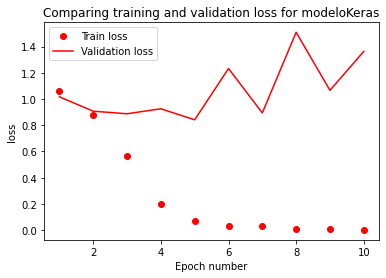

Minimum validation loss reached in epoch 5
5


In [68]:
import matplotlib.pyplot as plt

eval_metric(model, history, 'loss')
print(optimal_epoch(history))

In [89]:
# Applying regularisation

print('Building model...') 

reg_model = Sequential()
reg_model.add(Embedding(15000, embed_dim, input_length = features.shape[1]))
model.add(Dropout(0.2))
reg_model.add(LSTM(lstm_out))
reg_model.add(Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='softmax'))

# Compile model
reg_model.compile( optimizer='adam', # optimazer
              loss = 'categorical_crossentropy', # loss function
              metrics = ['accuracy']) # list of metrics

model._name = 'modeloKerasreg'
print(reg_model.summary())

Building model...
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 28, 128)           1920000   
_________________________________________________________________
lstm_8 (LSTM)                (None, 200)               263200    
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 603       
Total params: 2,183,803
Trainable params: 2,183,803
Non-trainable params: 0
_________________________________________________________________
None


In [90]:
# Fit the model
reg_history = reg_model.fit(X_train, Y_train, 
                    validation_split=0.33, 
                    batch_size = epochs, 
                    epochs = epochs, verbose = True)

Epoch 1/10
134/134 [==============================] - 7s 50ms/step - loss: 1.0199 - accuracy: 0.4622 - val_loss: 0.9434 - val_accuracy: 0.5281
Epoch 2/10
134/134 [==============================] - 7s 49ms/step - loss: 0.7827 - accuracy: 0.6507 - val_loss: 0.9475 - val_accuracy: 0.5493
Epoch 3/10
134/134 [==============================] - 6s 46ms/step - loss: 0.3148 - accuracy: 0.8953 - val_loss: 0.9203 - val_accuracy: 0.6161
Epoch 4/10
134/134 [==============================] - 6s 46ms/step - loss: 0.0769 - accuracy: 0.9835 - val_loss: 1.1868 - val_accuracy: 0.6692
Epoch 5/10
134/134 [==============================] - 6s 48ms/step - loss: 0.0250 - accuracy: 0.9963 - val_loss: 1.1235 - val_accuracy: 0.7117
Epoch 6/10
134/134 [==============================] - 7s 49ms/step - loss: 0.0154 - accuracy: 0.9985 - val_loss: 1.2496 - val_accuracy: 0.7117
Epoch 7/10
134/134 [==============================] - 6s 48ms/step - loss: 0.0211 - accuracy: 0.9970 - val_loss: 1.3699 - val_accuracy: 0.6965

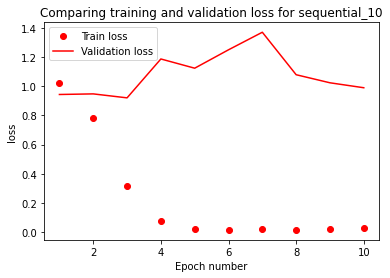

Minimum validation loss reached in epoch 3
3


In [91]:
eval_metric(reg_model, reg_history, 'loss')
print(optimal_epoch(reg_history))

In [92]:


# Optimal epochs
base_min = 1 # first model
reg_min = 2 # model with regularisation

# Training on the full train data and evaluation on test data on first model
base_results = test_model(model, X_train, Y_train, X_test, Y_test, base_min)



16/16 [==============================] - 0s 10ms/step - loss: 0.7600 - accuracy: 0.7335

Test accuracy: 73.35%


In [93]:


# Training on second model with regularisation and evaluation on data on second model
reg_results = test_model(reg_model, X_train, Y_train, X_test, Y_test, reg_min)



16/16 [==============================] - 0s 11ms/step - loss: 0.8233 - accuracy: 0.7675

Test accuracy: 76.75%


In [94]:
#save first model and architecture
model.save('./models/LSTM_model.h5')
print('Saved LSTM model to models folder')

# save second model and architecture
reg_model.save('./models/LSTM_regmodel.h5')
print('Saved LSTM model to models folder')

Saved LSTM model to models folder
Saved LSTM model to models folder


In [96]:


# saving predictions
X_train, X_test, Y_train, Y_test

#-- LSTM model ----#
y_preds_LSTM = model.predict(X_test)

# Save predictions for evaluation as numpy arrays
np.save('./pred/y_predsLSTM.npy', y_preds_LSTM)

#-- LSTM with regularisation model ----#
y_preds_LSTMreg = reg_model.predict(X_test)

# Save predictions for evaluation as numpy arrays
np.save('./pred/y_predsLSTMreg.npy', y_preds_LSTMreg)

# Save test data
np.save('./Outputs/y_testLSTM.npy', Y_test)

